<a href="https://colab.research.google.com/github/Kostratana/karate_evalution_computer_vision/blob/main/Audio_v3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт библиотеки librosa
import librosa

# Импорт библиотеки NumPy
import numpy as np

# Импорт модуля для воспроизведения аудио
import IPython.display as ipd

import IPython

import matplotlib.pyplot as plt
import librosa.display as ld

import pandas as pd

import soundfile as sf

from scipy import signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Функция нормализации аудиосигнала
def norm(arr):
    rez = np.empty((len(arr),len(arr[0])), dtype='float32')
    for j in range(0,len(arr[0])):
        _max = float('-inf')
        _min = float('inf')
        for i in range(0, len(arr)):
            if _max < arr[i][j]:
                _max = arr[i][j]
            if _min > arr[i][j]:
                _min = arr[i][j]
        for i in range(0, len(arr)):
            rez[i][j] = (arr[i][j]-_min)/(_max-_min)
    return rez

n_fft=2048
win_length=n_fft
hop_length=win_length//4


In [ ]:
#Загрузка аудиосигнала
y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/gyaku.mp4')
y2, sr2 = librosa.load('/content/drive/MyDrive/Colab Notebooks/K3_sinc_mask_maj_giry_1.mp4', duration = 0.25)

sf.write('/content/drive/MyDrive/Colab Notebooks/clap.wav',y2, sr2, subtype='PCM_24')

<ipython-input-3-db0c18c6ca05>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('/content/drive/MyDrive/Colab Notebooks/gyaku.mp4')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-3-db0c18c6ca05>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load('/content/drive/MyDrive/Colab Notebooks/K3_sinc_mask_maj_giry_1.mp4', duration = 0.25)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
len(y2)

5513

<ipython-input-3-b5b1773cfd4f>:13: RuntimeWarning: invalid value encountered in float_scalars
  rez[i][j] = (arr[i][j]-_min)/(_max-_min)


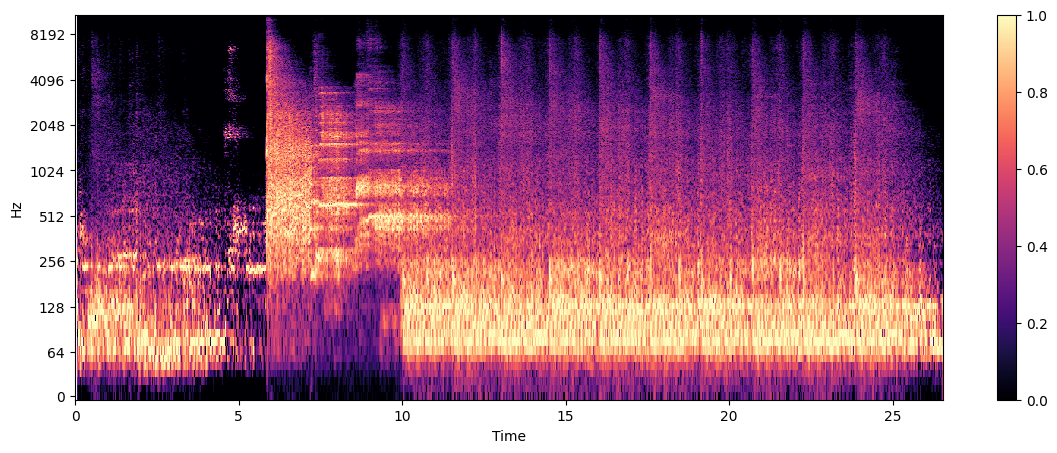

In [ ]:
#Разложение аудиодорожки на акуститечский спектр
X = librosa.stft(y, n_fft=n_fft,hop_length=hop_length, win_length=win_length)
Xdb = librosa.amplitude_to_db(abs(X))
Xdbn =norm(Xdb)
#Построение спектрограммы
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdbn, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

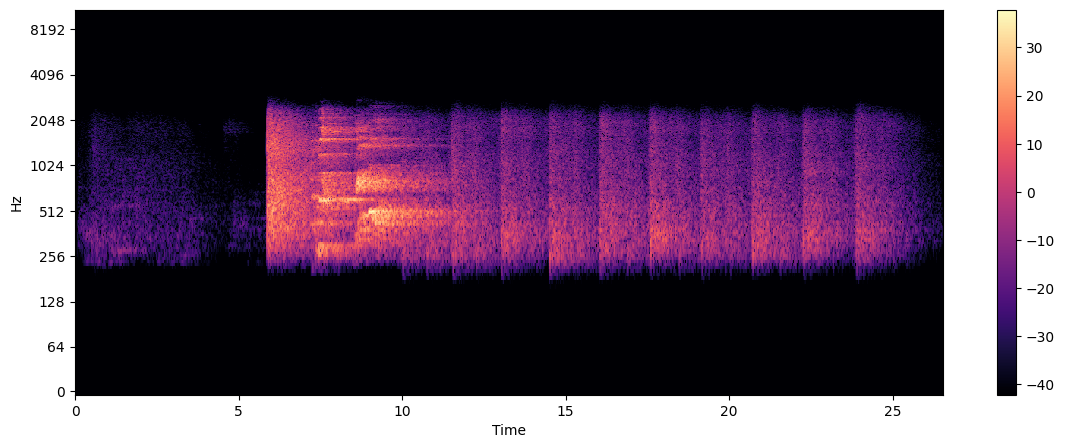

In [ ]:
b, a = signal.butter(6, [0.025, 0.2], 'bandpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filteredy = signal.filtfilt(b, a, y)  # данные - это сигнал, который нужно отфильтровать
#filteredy = librosa.filters.mel(sr=sr, n_fft=n_fft, fmin=256, fmax=2048)

#Разложение аудиодорожки на акуститечский спектр
X = librosa.stft(filteredy)
Xdb = librosa.amplitude_to_db(abs(X))
#Xdbn =norm(Xdb)
#Построение спектрограммы
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

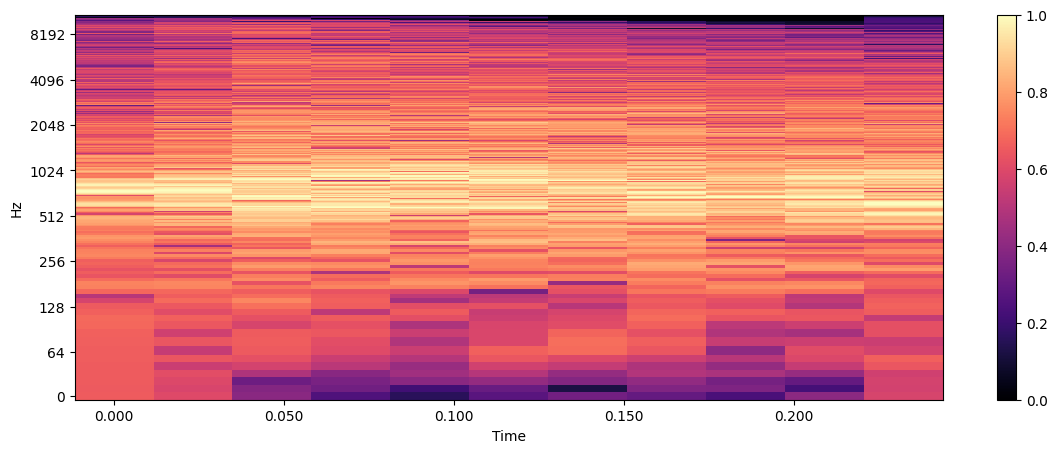

In [ ]:
X2 = librosa.stft(y2)
Xdb2 = librosa.amplitude_to_db(abs(X2))
Xdbn2 = norm(Xdb2)
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdbn2, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

<ipython-input-81-c1f68c51457f>:27: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(data, sr=sr2, x_axis='time', y_axis='log')


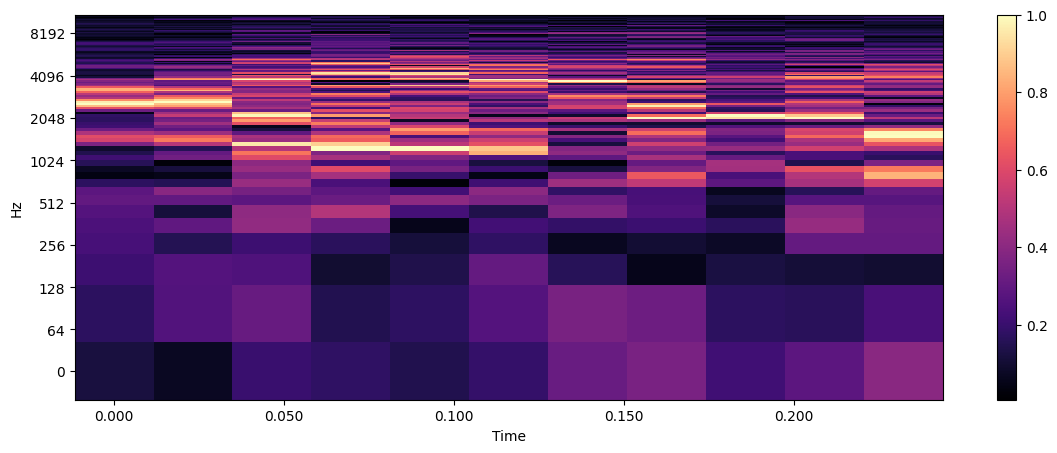

In [ ]:
b, a = signal.butter(5, [0.025, 0.2], 'bandpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filteredy2 = signal.filtfilt(b, a, y2)  # данные - это сигнал, который нужно отфильтровать
filteredX2 = librosa.stft(filteredy2)
filteredXdb2 = filteredX2
#filteredXdb2 = librosa.amplitude_to_db(abs(filteredX2))
filteredXdbn2 = librosa.util.normalize(filteredXdb2, axis = 0, fill = True)
low_row = 0
for i in range(len(filteredXdbn2)):
    if sum(abs(filteredXdbn2[i]))/len(filteredXdbn2[i]) < 0.2:
        low_row = i+1
    else:
        break
high_row = len(filteredXdbn2)
for i in range(len(filteredXdbn2)-1, low_row+1, -1):
    if sum(abs(filteredXdbn2[i]))/len(filteredXdbn2[i]) >= 0.2:
      break
    high_row = i

data = filteredXdbn2[low_row:high_row]

#Разложение аудиодорожки на акуститечский спектр
#X2 = librosa.stft(filteredX2)
#Xdb2 = librosa.amplitude_to_db(abs(X2))
#Xdbn2 =norm(Xdb2)
#Построение спектрограммы
plt.figure(figsize=(14, 5))
librosa.display.specshow(data, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

<ipython-input-15-cecc4ae3c9b6>:9: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(X3, sr=sr2, x_axis='time', y_axis='log')


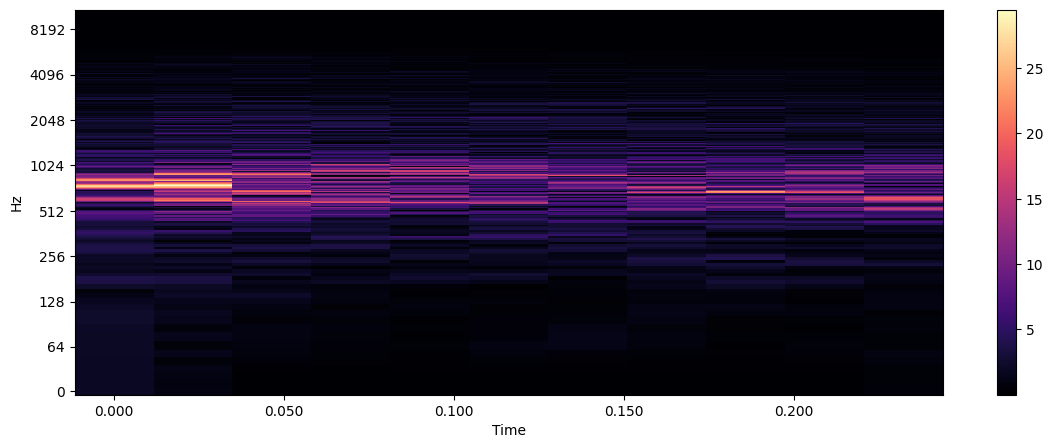

In [ ]:
#ФНЧ
b, a = signal.butter(5, 0.5, 'lowpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, y2)

X3 = librosa.stft(filtedData)
Xdb3 = librosa.amplitude_to_db(abs(X3))

plt.figure(figsize=(14, 5))
librosa.display.specshow(X3, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

<ipython-input-24-912b57ab6c11>:9: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(X3, sr=sr2, x_axis='time', y_axis='log')


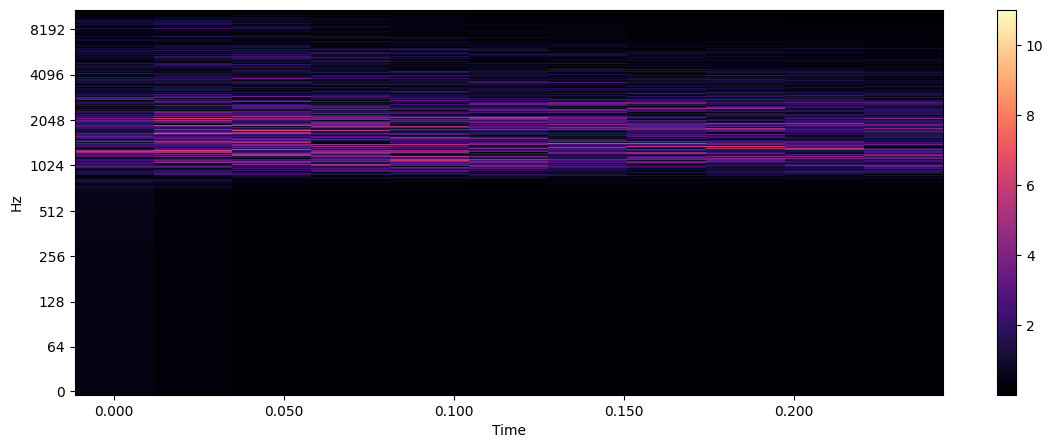

In [ ]:
#ФВЧ
b, a = signal.butter(5, 0.1, 'highpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, y2)

X3 = librosa.stft(filtedData)
Xdb3 = librosa.amplitude_to_db(abs(X3))

plt.figure(figsize=(14, 5))
librosa.display.specshow(X3, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

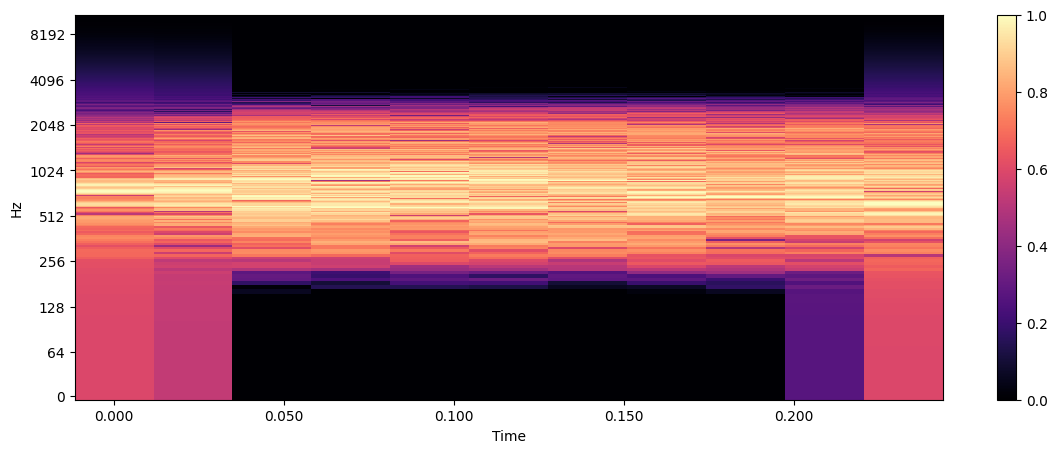

In [ ]:
#Полосовой фильтр
b, a = signal.butter(8, [0.2,0.8], 'bandpass')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, y2)
plt.figure(figsize=(14, 5))
librosa.display.specshow(data, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

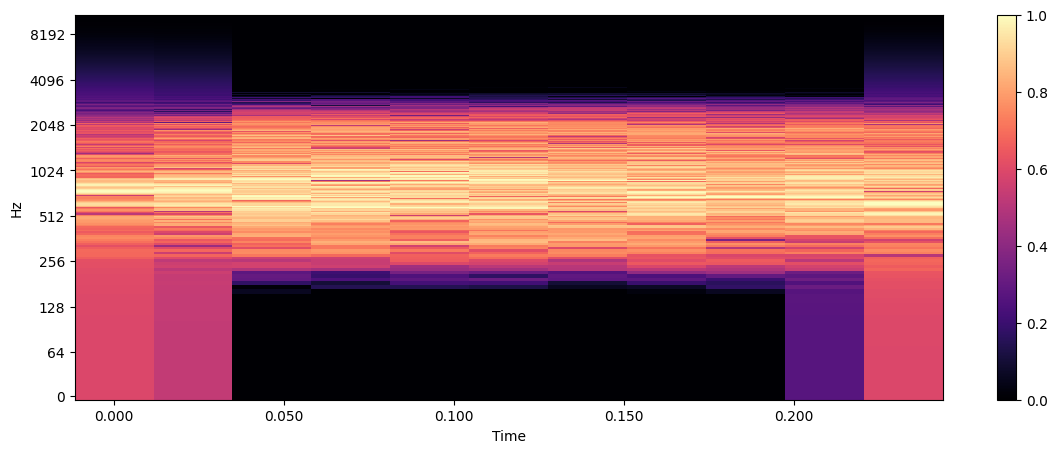

In [ ]:
#Полосовой стопорный фильтр
b, a = signal.butter(8, [0.2,0.8], 'bandstop')   # Конфигурационный фильтр 8 указывает порядок фильтра
filtedData = signal.filtfilt(b, a, y2)
plt.figure(figsize=(14, 5))
librosa.display.specshow(data, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
xsim = librosa.segment.cross_similarity(y, y2)

KeyboardInterrupt: ignored

In [ ]:
#Функция корреляции
correlation = signal.correlate2d(norm(X), norm(X2), mode='same')

<ipython-input-17-fd42f0c799ac>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  rez[i][j] = (arr[i][j]-_min)/(_max-_min)


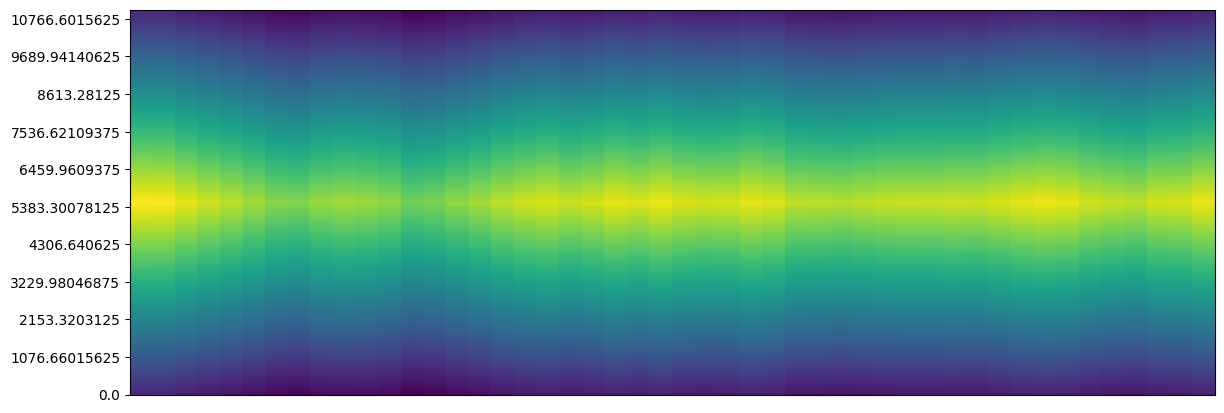

In [ ]:
#График двумерной корреляции
corrtmp = correlation[:,round(5.7*sr/hop_length):round(6.8*sr/hop_length)]
plt.figure(figsize=(14, 5))
plt.pcolor(corrtmp)
plt.xticks(ticks = [i*sr for i in range(int(len(corrtmp[0])/sr))], labels = [i for i in range(int(len(corrtmp[0])/sr))])
plt.yticks(ticks = range(0,1025,100), labels = librosa.fft_frequencies(sr=sr,n_fft=n_fft)[::100])
plt.show()

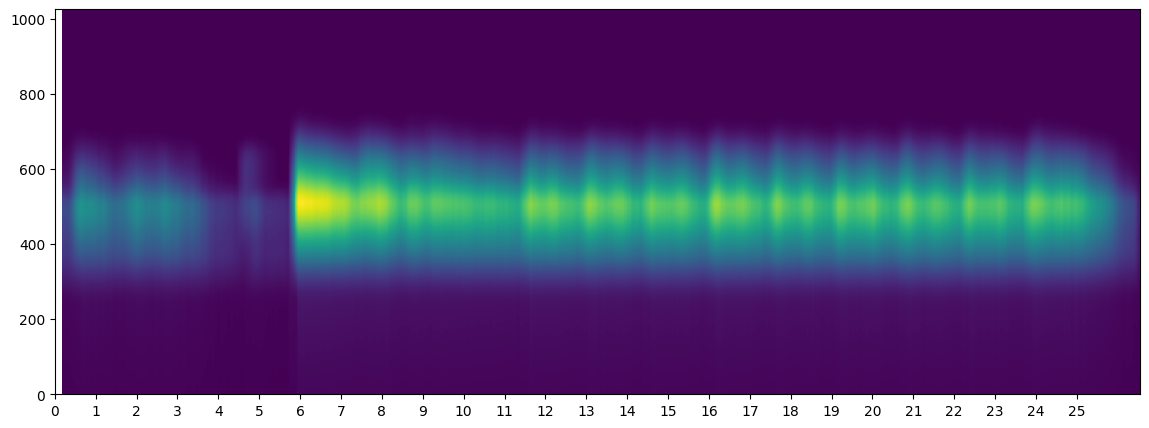

In [ ]:
#График двумерной корреляции
plt.figure(figsize=(14, 5))
plt.pcolor(correlation)
plt.xticks(ticks = [i*sr/512 for i in range(int(len(correlation[0])*512/sr))], labels = [i for i in range(int(len(correlation[0])*512/sr))])
plt.show()

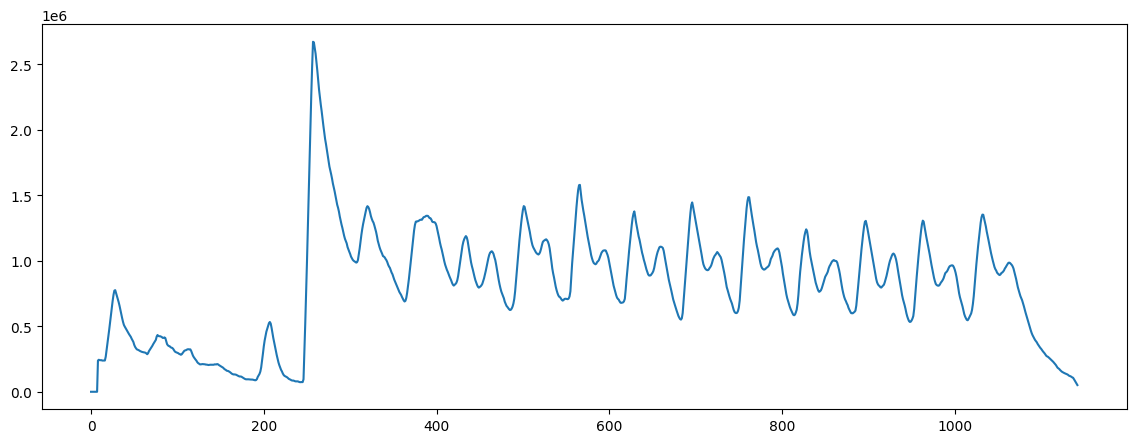

In [ ]:
#График кореляции по кадрам
corr = []
for j in range(len(correlation[0])):
    _sum = 0
    for i in range(len(correlation)):
        if not np.isnan(correlation[i][j]):
            _sum += correlation[i][j]
    corr.append(_sum)
plt.figure(figsize=(14, 5))
plt.plot(corr)
plt.show()

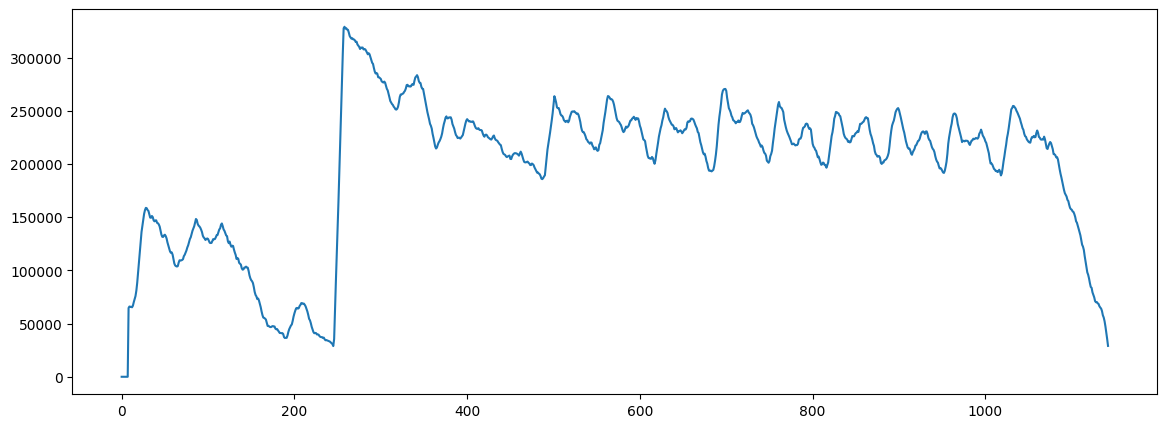

In [ ]:
#График кореляции по кадрам
corr = []
for j in range(len(correlation[0])):
    _sum = 0
    for i in range(len(correlation)):
        if not np.isnan(correlation[i][j]):
            _sum += correlation[i][j]
    corr.append(_sum)
plt.figure(figsize=(14, 5))
plt.plot(corr)
plt.show()

In [ ]:
corrnp = np.array(corr)
print(corrnp.argmax())
corrnp.argmax()*512/sr

257


5.9675283446712015

In [ ]:
len(filteredX2[0])

11